In [6]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
from scipy.stats import stats
warnings.filterwarnings('ignore')

In [2]:
# load database connection
conn = sqlite3.connect('inventory.db')

df=pd.read_sql_query("select * from vendor_sales_summery", con=conn)
df.head(
    
)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,6798,109923.66,517,10851.83,461.78,949.94,257032.07,-99071.83,-912.950442,0.076052,0.098722
1,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,30.76,39.99,1750.0,3169,97478.44,148,5622.52,835.78,271.95,123780.22,-91855.92,-1633.714420,0.046702,0.057680
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,4036,93594.84,341,9885.59,637.78,626.58,144929.24,-83709.25,-846.780516,0.084490,0.105621
3,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,3307,86874.89,170,5948.30,769.78,312.35,68601.68,-80926.59,-1360.499470,0.051406,0.068470
4,8004,SAZERAC CO INC,5138,Fireball Cinnamon Whisky,11.10,13.99,750.0,5998,66577.80,344,4812.56,601.57,270.86,50293.62,-61765.24,-1283.417557,0.057352,0.072285


In [4]:
# summery statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,4701.0,9.125857e+03,15643.022701,60.00,3252.00,7153.000000,9552.000000,173357.000000
Brand,4701.0,1.647393e+04,13252.166401,58.00,4414.00,13899.000000,25623.000000,90631.000000
PurchasePrice,4701.0,1.420384e+01,37.707353,0.38,6.53,9.390000,15.190000,2222.210000
Actualprice,4701.0,2.071030e+01,48.359478,0.49,9.99,13.990000,21.990000,2799.990000
Volume,4701.0,8.999668e+02,714.823770,50.00,750.00,750.000000,750.000000,18000.000000
TotalPurchasesQuantity,4701.0,2.298685e+02,525.552635,1.00,24.00,63.000000,191.000000,12030.000000
TotalPurchasesDollars,4701.0,2.261578e+03,5718.686045,0.72,216.72,690.200000,1984.200000,109923.660000
TotalSalesQuantity,4701.0,1.436375e+01,40.937139,0.00,0.00,1.000000,12.000000,837.000000
TotalSalesDollars,4701.0,1.816698e+02,540.608236,0.00,0.00,11.990000,172.780000,10851.830000
TotalSalesPrice,4701.0,7.964973e+01,145.407845,0.00,0.00,10.990000,105.960000,1919.900000


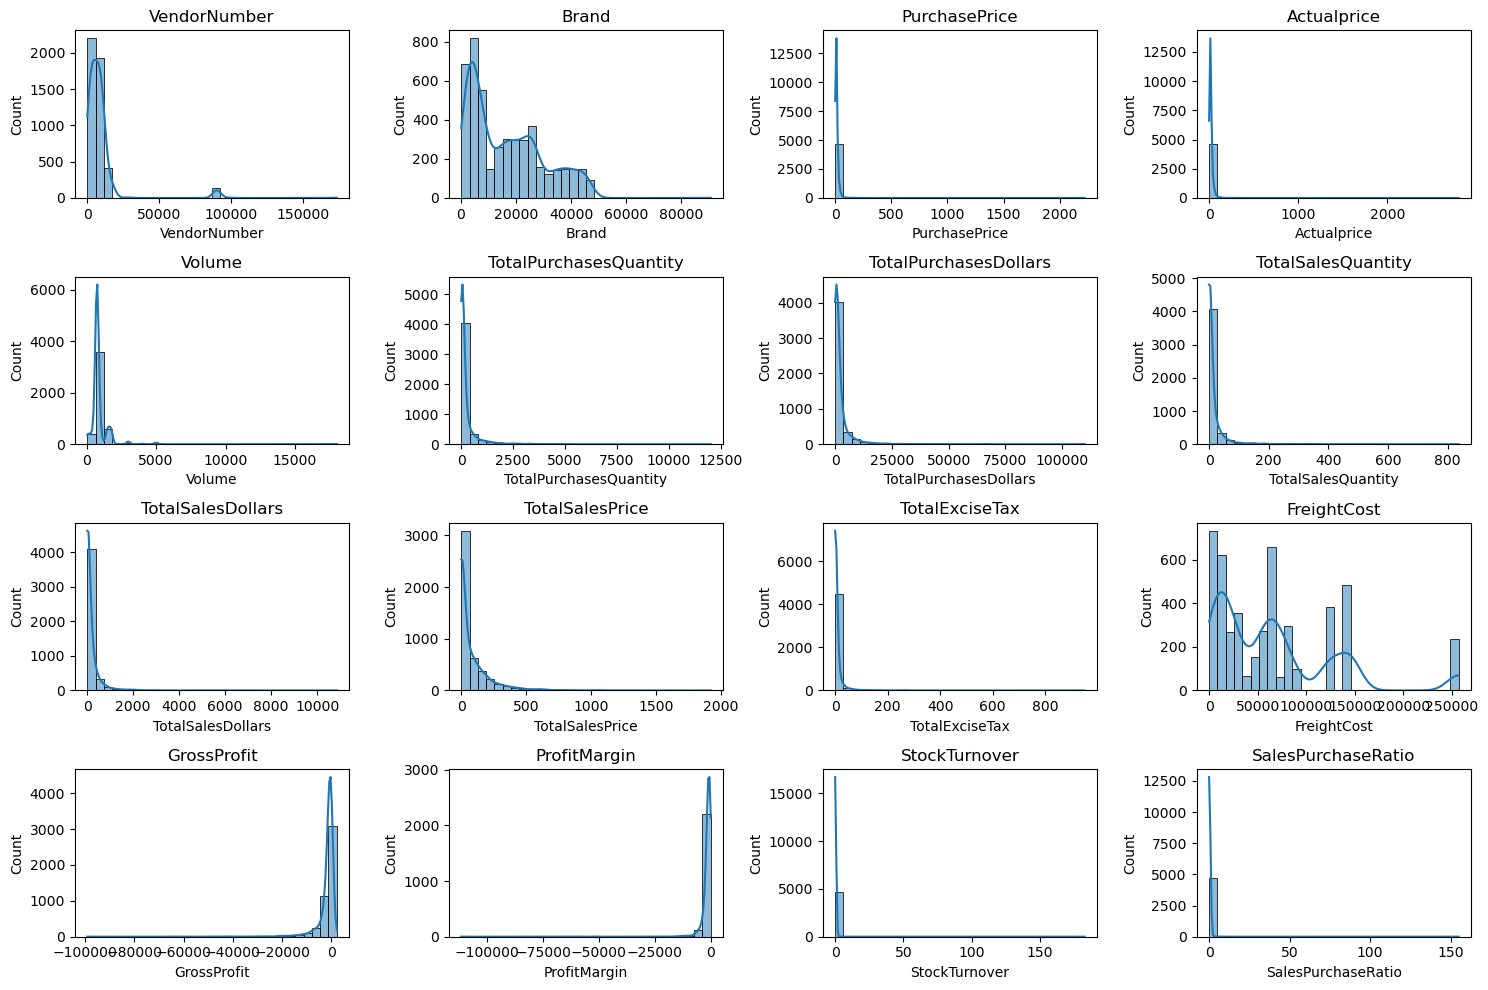

In [29]:
# Distribution Plot for Numeric Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

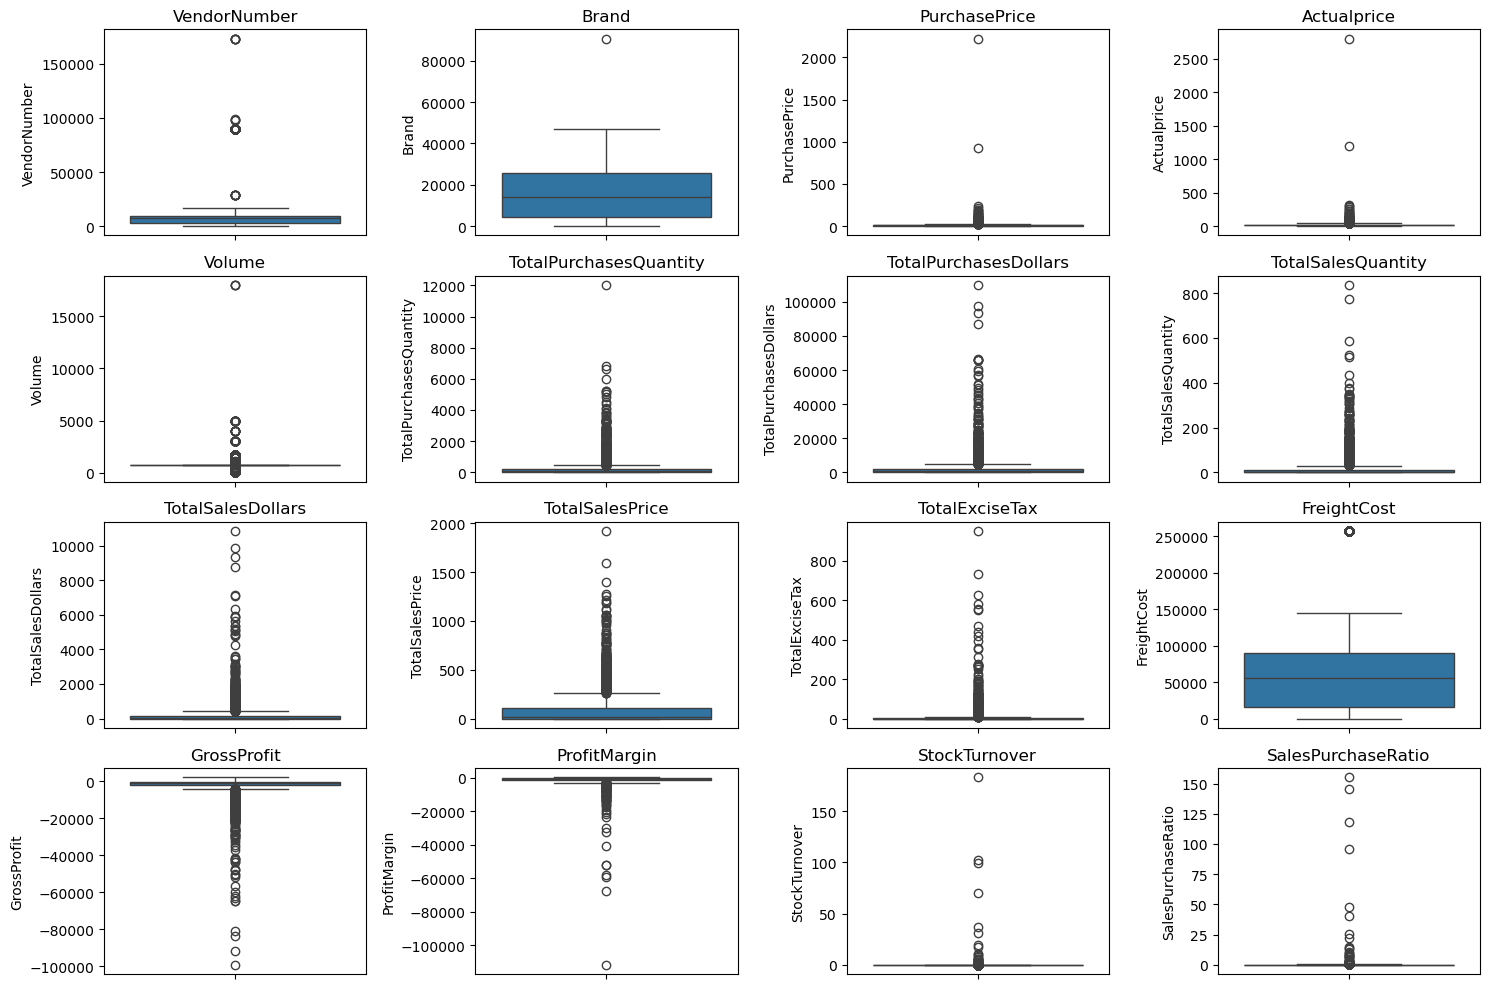

In [30]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()